In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

In [2]:
# Read country file and store into Pandas data frame
land_temp_by_country_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByCountry.csv"
land_temp_by_country_df = pd.read_csv(land_temp_by_country_csv)
land_temp_by_country_df.tail()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [3]:
# Read cities file and store into Pandas data frame
land_temp_by_city_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByCity.csv"
land_temp_by_city_df = pd.read_csv(land_temp_by_city_csv)
land_temp_by_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [4]:
# Read major cities file and store into Pandas data frame
land_temp_by_major_city_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByMajorCity.csv"
land_temp_by_major_city_df = pd.read_csv(land_temp_by_major_city_csv)
land_temp_by_major_city_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
# Read state file and store into Pandas data frame
land_temp_by_state_csv = "../../ProjectOne_datasets/GlobalLandTemperaturesByState.csv"
land_temp_by_state_df = pd.read_csv(land_temp_by_state_csv)
land_temp_by_state_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [6]:
population_growth_country_csv = "../../ProjectOne_datasets/population-by-country.csv"
population_growth_country_df = pd.read_csv(population_growth_country_csv)
population_growth_country_df.tail()

#Rename Column for World Population data
population_growth_country_df = population_growth_country_df.rename(columns={"Population by Country (Clio Infra (2016))":"Population",
                                                                           "Entity":"Country"})
population_growth_country_df.head()

,Country,Code,Year,Population
0,Afghanistan,AFG,1500,2000000.0
1,Afghanistan,AFG,1600,2500000.0
2,Afghanistan,AFG,1700,2500000.0
3,Afghanistan,AFG,1800,3280000.0
4,Afghanistan,AFG,1820,3280000.0


In [7]:
print(f"Country Size: {len(land_temp_by_country_df)}")
print(f"Cities Size: {len(land_temp_by_city_df)}")
print(f"Major Cities Size: {len(land_temp_by_major_city_df)}")
print(f"State Size: {len(land_temp_by_state_df)}")


Country Size: 577462
Cities Size: 8599212
Major Cities Size: 239177
State Size: 645675


In [8]:
# Cleanup Datasets
#Drop AverageTemperatureUncertainty
land_temp_by_country_df = land_temp_by_country_df.drop(["AverageTemperatureUncertainty"], axis=1)
land_temp_by_city_df = land_temp_by_city_df.drop(["AverageTemperatureUncertainty"], axis=1)
land_temp_by_major_city_df = land_temp_by_major_city_df.drop(["AverageTemperatureUncertainty"], axis=1)
land_temp_by_state_df = land_temp_by_state_df.drop(["AverageTemperatureUncertainty"], axis=1)


In [9]:
#Remove rows with null temperatures
land_temp_by_country_df = land_temp_by_country_df[land_temp_by_country_df["AverageTemperature"].notna()]
land_temp_by_city_df = land_temp_by_city_df[land_temp_by_city_df["AverageTemperature"].notna()]
land_temp_by_major_city_df = land_temp_by_major_city_df[land_temp_by_major_city_df["AverageTemperature"].notna()]
land_temp_by_state_df = land_temp_by_state_df[land_temp_by_state_df["AverageTemperature"].notna()]
population_by_country_df = population_growth_country_df[population_growth_country_df["AverageTemperature"].notna()]


print(f"Country Size: {len(land_temp_by_country_df)}")
print(f"Cities Size: {len(land_temp_by_city_df)}")
print(f"Major Cities Size: {len(land_temp_by_major_city_df)}")
print(f"State Size: {len(land_temp_by_state_df)}")

KeyError: 'AverageTemperature'

In [10]:
#Retrieve rows for the last century
cent_land_temp_by_country_df = land_temp_by_country_df.loc[land_temp_by_country_df["dt"] >= "1900-01-01"]
cent_land_temp_by_city_df = land_temp_by_city_df.loc[land_temp_by_city_df["dt"] >= "1900-01-01"]
cent_land_temp_by_major_city_df = land_temp_by_major_city_df.loc[land_temp_by_major_city_df["dt"] >= "1900-01-01"]
cent_land_temp_by_state_df = land_temp_by_state_df.loc[land_temp_by_state_df["dt"] >= "1900-01-01"]

print(f"Country Size: {len(cent_land_temp_by_country_df)}")
print(f"Cities Size: {len(cent_land_temp_by_city_df)}")
print(f"Major Cities Size: {len(cent_land_temp_by_major_city_df)}")
print(f"State Size: {len(cent_land_temp_by_state_df)}")

Country Size: 328818
Cities Size: 4788080
Major Cities Size: 136407
State Size: 328784


In [11]:
cent_land_temp_by_country_df.dtypes

dt                     object
AverageTemperature    float64
Country                object
dtype: object

In [24]:
#USA Data 
usa_land_temp_by_country_df = cent_land_temp_by_country_df.loc[land_temp_by_country_df["Country"] == "United States"]
usa_land_temp_by_country_df = usa_land_temp_by_country_df.groupby((pd.DatetimeIndex(usa_land_temp_by_country_df["dt"]).year//10)*10).mean()
usa_land_temp_by_country_df["Country"] = "United States"

usa_land_temp_by_country_df.reset_index(inplace=True)
usa_land_temp_by_country_df = usa_land_temp_by_country_df.rename(columns = {'dt':'Decade'})
usa_land_temp_by_country_df = usa_land_temp_by_country_df.rename(columns = {'AverageTemperature':'Land Temperature'})
usa_land_temp_by_country_df = usa_land_temp_by_country_df.loc[usa_land_temp_by_country_df["Decade"] != 2010]
usa_land_temp_by_country_df

,Decade,Land Temperature,Country
0,1900,8.448225,United States
1,1910,8.460250,United States
2,1920,8.755250,United States
3,1930,9.086992,United States
4,1940,8.924092,United States
5,1950,8.913233,United States
6,1960,8.721917,United States
7,1970,8.696925,United States
8,1980,9.104308,United States
9,1990,9.317558,United States


In [25]:
usa_population_growth_country_df = population_growth_country_df.loc[population_growth_country_df["Country"] == "United States"]
usa_population_growth_country_df = usa_population_growth_country_df.loc[usa_population_growth_country_df["Year"] >= 1900]
usa_population_growth_country_df = usa_population_growth_country_df.rename(columns = {'Year':'Decade'})
usa_population_growth_country_df

,Country,Code,Decade,Population
3081,United States,USA,1900,76391000.0
3082,United States,USA,1910,92767000.0
3083,United States,USA,1920,106881000.0
3084,United States,USA,1930,123668000.0
3085,United States,USA,1940,132637000.0
3086,United States,USA,1950,152271000.0
3087,United States,USA,1960,180671000.0
3088,United States,USA,1970,205052000.0
3089,United States,USA,1980,227726463.0
3090,United States,USA,1990,250131894.0


In [26]:
final_df = pd.merge(usa_land_temp_by_country_df, usa_population_growth_country_df, on="Decade")
final_df = final_df.drop(["Code"], axis=1)
final_df = final_df.drop(["Country_y"], axis=1)
final_df = final_df.rename(columns = {'Country_x':'Country'})

final_df

,Decade,Land Temperature,Country,Population
0,1900,8.448225,United States,76391000.0
1,1910,8.460250,United States,92767000.0
2,1920,8.755250,United States,106881000.0
3,1930,9.086992,United States,123668000.0
4,1940,8.924092,United States,132637000.0
5,1950,8.913233,United States,152271000.0
6,1960,8.721917,United States,180671000.0
7,1970,8.696925,United States,205052000.0
8,1980,9.104308,United States,227726463.0
9,1990,9.317558,United States,250131894.0


In [27]:
column_names = ["Country", "Decade", "Land Temperature", "Population"]
final_df = final_df.reindex(columns=column_names)
final_df

,Country,Decade,Land Temperature,Population
0,United States,1900,8.448225,76391000.0
1,United States,1910,8.460250,92767000.0
2,United States,1920,8.755250,106881000.0
3,United States,1930,9.086992,123668000.0
4,United States,1940,8.924092,132637000.0
5,United States,1950,8.913233,152271000.0
6,United States,1960,8.721917,180671000.0
7,United States,1970,8.696925,205052000.0
8,United States,1980,9.104308,227726463.0
9,United States,1990,9.317558,250131894.0


The correlation coefficient: 0.79.


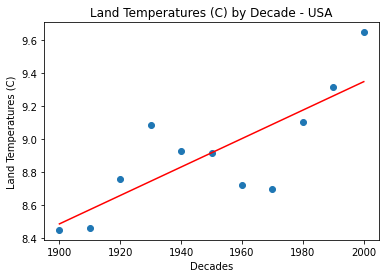

In [29]:
x_axis = final_df["Decade"]
y_axis = final_df["Land Temperature"]

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
plt.annotate(line_equation, (1900, 10), color="red")

plt.title("Land Temperatures (C) by Decade - USA")
plt.xlabel("Decades")
plt.ylabel("Land Temperatures (C)")
plt.show()

The correlation coefficient: 0.99.


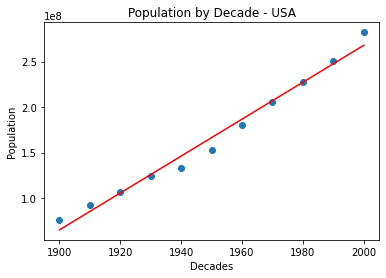

In [23]:
x_axis = final_df["Decade"]
y_axis = final_df["Population"]

correlation_coeff = st.pearsonr(x_axis, y_axis)
print(f"The correlation coefficient: {round(correlation_coeff[0],2)}.")

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regression_value = slope * x_axis + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regression_value, "r-")
plt.annotate(line_equation, (1900, 10), color="red")

plt.title("Population by Decade - USA")
plt.xlabel("Decades")
plt.ylabel("Population")
plt.show()